# Lab Week 5
This week you will work on descriptive statistics for a survey dataset and generate suitable visualisations for different question types, different categories.  This analysis is based on the openly available dataset attached to the following paper:

https://dl.acm.org/citation.cfm?id=3300310

The survey was looking at attitudes and acceptance of VR headset during airplane travel.  


In [1]:
# Choose any visualistion tool for the charts in this notebook

import pandas as pd
import numpy as np
import seaborn as sns

sns.set_theme()



In [2]:
# Begin by loading the dataset into Pandas
# Familiarise yourself with the structure and basic content of the survey
survey_data = pd.read_excel('PlaneVRSurvey.xlsx')

In [3]:
survey_data.head()

,Respondent ID,How old are you?,In which country do you reside?,What is your gender?,Do you consider yourself a frequent flyer?,"How do you typically spend your time while travelling? Entertainment (such as videos, games, reading)",How do you typically spend your time while travelling? Productivity (including any work related activities),How do you typically spend your time while travelling? Sleeping,How do you typically spend your time while travelling? Other,How do you typically spend your time while travelling? Other Specify,...,Seatback Middle How comfortable would you feel if you needed to get this person's attention?,"Seatback Middle If you needed to get this person's attention, what would you do?",Seatback Middle Open-Ended Response,Seatback Aisle How comfortable would you feel sitting in the middle seat next to this person?,Seatback Aisle How comfortable would you feel sitting in the window seat in the same row as this person?,Seatback Aisle How acceptable do you feel it is for someone else to use the seat-back displayÂ like this when sitting in the aisle seat?,Seatback Aisle HowÂ acceptable do you feel it is for you to use a seat-back displayÂ like this when sitting in the aisle seat?,Seatback Aisle How comfortable would you feel if you needed to get this person's attention?,"Seatback Aisle If you needed to get this person's attention, what would you do?",Seatback Aisle Open-Ended Response
0,6664235505,48,United Kingdom,Male,No,Most of my time,A little of my time,Some of my time,NaN,NaN,...,1.0,Speak to them.,NaN,1.0,1.0,1.0,1.0,1.0,"Say ""excuse me.""",NaN
1,6657897419,32,United Kingdom,Male,Yes,Most of my time,None of my time,None of my time,Some of my time,staring at the seat in front,...,1.0,just speak to them directly,NaN,1.0,1.0,1.0,1.0,1.0,speak to them,NaN
2,6657834908,32,United Kingdom,Male,Yes,Most of my time,Some of my time,None of my time,Some of my time,interacting with colleagues and friends,...,1.0,speak to them,no,1.0,1.0,1.0,1.0,1.0,i would say excuse me or wave my hand for atte...,this person is sitting in an emergency door ar...
3,6652662003,41,United States,Male,Yes,Most of my time,Some of my time,Some of my time,NaN,NaN,...,2.0,Lean slightly into their personal space saying...,NaN,1.0,1.0,1.0,1.0,2.0,"â€œExcuse meâ€, leaning in.",NaN
4,6645466389,47,Hungary,Male,No,Most of my time,A little of my time,A little of my time,A little of my time,"Eat, talk, etc",...,1.0,talk to her,NaN,1.0,1.0,1.0,1.0,1.0,talk to her,NaN


# Participant Demographics

Given the demographic information collected in the survey, calculate a set of meaningful metrics, such as breakdown of gender, physical location, and experience with VR.  If relevant, add a suitable visualisation to illustrate any demographic information.

In [4]:
# Participant Demographics 

survey_data["What is your gender?"].value_counts()

Male                      61
Female                    17
Prefer Not toÂ Respond     2
Name: What is your gender?, dtype: int64

<AxesSubplot:xlabel='What is your gender?', ylabel='Count'>

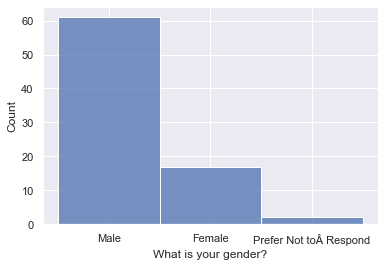

In [5]:
sns.histplot(survey_data["What is your gender?"])

In [6]:
survey_data["In which country do you reside?"].value_counts()

United Kingdom    38
United States     28
Spain              2
Australia          1
Argentina          1
Hungary            1
Italy              1
Bahamas, The       1
Brazil             1
Finland            1
Taiwan             1
Saudi Arabia       1
Canada             1
Name: In which country do you reside?, dtype: int64

<AxesSubplot:xlabel='How old are you?', ylabel='Count'>

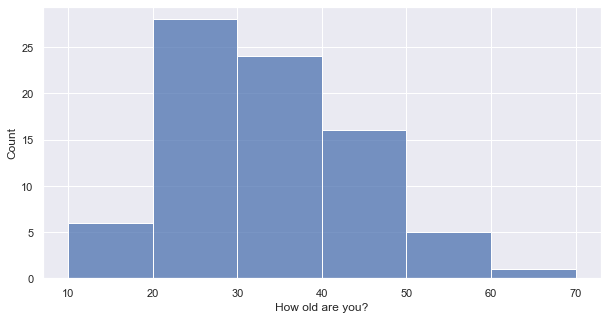

In [21]:
sns.histplot(survey_data["How old are you?"], bins=np.arange(10, 71, 10))


# High Level Overview

There are multiple ways you could calculate high level results of this data.  All responses could be collapsed into groups for VR, Eyemask, and Seatback Displays. Similarly, all responses could be collapsed into categories for aisle, middle, and window seats.  Responses to a specific question, for example "how acceptable," could be collapsed into groupings for device type of seat position.  Each of these different ways of "slicing" the data allows to you explore different aspects of the results.  Based on your own opinion of what is the key research question addressed by this survey, choose a method for slicing/collapsing the data and calculate a high level overview of a result from this dataset. 

In [8]:
# High Level Overview



# Visualising Scale Data

Scale data, like the 5 point scales used in this survey, are incredibly popular but also present some challenges.  Averaging ordinal data is typically not meaningful because ordinal scales don't have objectively measurable differences between scale items.  For example, if one respondent rates "5" and one rate "1", averaging these scores does not accurately reflect the data.  

For scale data, stacked bar charts give a much more detailed view of the data. Consider the example below:

![Acceptability of In-flight Devices Based on Seat](AcceptabilityBySeat.png)

Reproduce this visualisation from the survey data/


In [9]:
# Reproduce a stacked bar chart

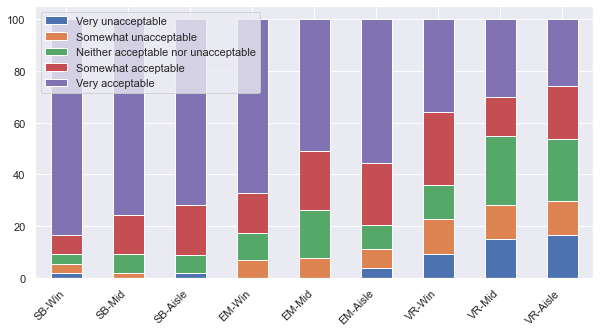

In [33]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,5)})

answers = ['Very unacceptable','Somewhat unacceptable','Neither acceptable nor unacceptable','Somewhat acceptable','Very acceptable']
stackOrder = [5.0,4.0,3.0,2.0,1.0]

acceptable_data = survey_data[["Seatback Window HowÂ acceptable do you feel it is for you to use a seat-back displayÂ like this when sitting in the window seat?", 
                               "Seatback Middle HowÂ acceptable do you feel it is for you to use a seat-back displayÂ like this when sitting in the middle seat?",
                               "Seatback Aisle HowÂ acceptable do you feel it is for you to use a seat-back displayÂ like this when sitting in the aisle seat?",
                               "Eyemask Window HowÂ acceptable do you feel it is for you to wear an eye mask like this when sitting in the window seat?",
                               "Eyemask Middle How acceptable do you feel it is for someone else to wear an eye maskÂ like this when sitting in the middle seat?",
                               "Eyemask Aisle HowÂ acceptable do you feel it is for you to wear an eye mask like this when sitting in the aisle seat?",
                               "VR Window HowÂ acceptable do you feel it is for you to wear a VR headset like this when sitting in the window seat?",
                               "VR Middle How acceptable do you feel it is for you to wearÂ a VR headset like this when sitting in the middle seat?",
                               "VR Aisle HowÂ acceptable do you feel it is for you to wear a VR headset like this when sitting in the aisle seat?"]]

acceptable_data.columns=['SB-Win', 'SB-Mid', 'SB-Aisle', 'EM-Win', 'EM-Mid', 'EM-Aisle', 'VR-Win', 'VR-Mid', 'VR-Aisle']

acceptable_vcs = acceptable_data.apply(pd.Series.value_counts)

acceptable_vcs_prop = acceptable_vcs.div(acceptable_vcs.sum())*100.0

ax = acceptable_vcs_prop.reindex(index=stackOrder).T.plot.bar(stacked=True)
ax.legend(answers)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');